In [4]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code/')

from bycycle import features
from bycycle import cyclepoints
from bycycle.plts import plot_burst_detect_summary, plot_cyclepoints_array

import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole



from utils import inference
from utils.simulation_wrapper import (
    simulation_wrapper,
    simulation_wrapper_obs,

)
import torch

import matplotlib.pyplot as plt



from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference import SNPE_C, prepare_for_sbi, simulate_for_sbi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:


sim_wrapper = simulation_wrapper_obs
prior_min = [7.9, 43.8] 

prior_max = [30, 79.9]

true_params = torch.tensor([[26.61, 63.53]])

prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

theta, x_without = inference.run_sim_theta_x(
        prior, 
        simulation_wrapper=sim_wrapper, 
        num_simulations=30, 
        num_workers=8
    )

2
params size torch.Size([2, 2])
2 params are investigated
joblib will run over 1 jobs
2
params size torch.Size([2])
2 params are investigated
joblib will run over 1 jobs
Building the NEURON model
[Done]
running trial 1 on 1 cores
Simulation time: 0.03 ms...
Simulation time: 10.0 ms...
Simulation time: 20.0 ms...
Simulation time: 30.0 ms...
Simulation time: 40.0 ms...
Simulation time: 50.0 ms...
Simulation time: 60.0 ms...
Simulation time: 70.0 ms...
Simulation time: 80.0 ms...
Simulation time: 90.0 ms...
Simulation time: 100.0 ms...
Simulation time: 110.0 ms...
Simulation time: 120.0 ms...
Simulation time: 130.0 ms...
Simulation time: 140.0 ms...
Simulation time: 150.0 ms...
Simulation time: 160.0 ms...


Running 30 simulations in 30 batches.:   0%|          | 0/30 [00:00<?, ?it/s]

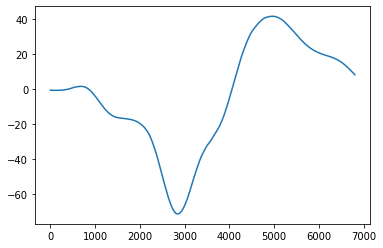

In [52]:
x_without[0]

plt.plot(x_without[0])

In [81]:
amp_frac.shape

torch.Size([1, 1373])

In [121]:
fs = 1000
f_range = (10, 30)

threshold_kwargs = {'amp_fraction_threshold': 0,
                    'amp_consistency_threshold': .2,
                    'period_consistency_threshold': .45,
                    'monotonicity_threshold': .7,
                    'min_n_cycles': 3}

amp_frac_list = []
for i in range(30):
  
    df_features = features.compute_features(x_without[i], fs, f_range, threshold_kwargs=threshold_kwargs)
    new = df_features['amp_fraction'][:35].to_numpy(dtype='float32')
    
    print(new.shape)

    amp_frac_list.append(new)
    
df_features


(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)
(35,)


,amp_fraction,amp_consistency,period_consistency,monotonicity,period,time_peak,time_trough,volt_peak,volt_trough,time_decay,...,time_rdsym,time_ptsym,band_amp,sample_peak,sample_last_zerox_decay,sample_zerox_decay,sample_zerox_rise,sample_last_trough,sample_next_trough,is_burst
0,0.083333,NaN,NaN,0.500000,112,48,64,0.569473,-0.222370,1,...,0.991071,0.428571,NaN,194,83,195,147,83,195,False
1,0.055556,-0.014939,0.385768,0.500000,103,56,47,1.322585,0.577405,1,...,0.990291,0.543689,NaN,297,195,298,242,195,298,False
2,0.194444,-0.014939,0.202247,0.978261,267,188,37,1.713703,1.328342,161,...,0.397004,0.835556,NaN,404,298,523,335,298,565,False
3,0.166667,-0.021473,0.081203,0.500000,54,28,43,0.364554,0.383318,53,...,0.018519,0.394366,NaN,566,523,594,566,565,619,False
4,0.972222,-0.021473,0.081203,0.500000,665,247,26,-0.835571,-0.810342,664,...,0.001504,0.904762,NaN,620,594,867,620,619,1284,False
5,0.027778,-0.010279,0.135338,0.500000,90,49,418,-17.816975,-17.813482,89,...,0.011111,0.104925,NaN,1285,867,1334,1285,1284,1374,False
6,0.527778,-0.010279,0.187110,0.500000,481,321,41,-18.238213,-18.233927,480,...,0.002079,0.886740,NaN,1375,1334,1696,1375,1374,1855,False
7,0.250000,-0.012091,0.205821,0.500000,99,57,160,-21.926687,-21.913870,98,...,0.010101,0.262673,NaN,1856,1696,1913,1856,1855,1954,False
8,0.611111,-0.012981,0.644231,0.500000,104,61,42,-23.953520,-23.929306,103,...,0.009615,0.592233,NaN,1955,1913,2016,1955,1954,2058,False
9,0.583333,-0.016251,0.507576,0.500000,67,35,43,-27.935030,-27.884007,66,...,0.014925,0.448718,NaN,2059,2016,2094,2059,2058,2125,False


In [120]:
amp_tensor = torch.tensor(amp_frac_list)

ValueError: expected sequence of length 43 at dim 1 (got 41)

In [117]:
print(amp_tensor)

tensor([[0.0233, 0.0465, 0.0698,  ..., 0.7442, 0.8372, 0.9070],
        [0.0976, 0.1220, 0.0732,  ..., 0.6829, 0.4878, 0.9512],
        [0.0435, 0.0217, 0.0652,  ..., 0.5000, 0.1739, 0.5870],
        ...,
        [0.0204, 0.0612, 0.1020,  ..., 0.7755, 0.9592, 0.8776],
        [0.0857, 0.1143, 0.2000,  ..., 0.9714, 0.8286, 0.3429],
        [0.0833, 0.0556, 0.1944,  ..., 0.4444, 1.0000, 0.8333]])


In [112]:

df_features

print(len(amp_frac_list))

30


In [118]:
posterior = inference.run_only_inference(theta, amp_tensor, prior)

Neural network successfully converged after 80 epochs.


In [17]:
# Find peaks and troughs (this function also does the above)
n_seconds_theta=0.5
peaks, troughs = cyclepoints.extrema.find_extrema(x_without[0], fs, f_range,
                             # filter_kwargs={'n_seconds':n_seconds_theta}
                                                 )

In [18]:
peaks

y_values= []
y_vals_t = []

for peak in peaks:
    y_value = x_without[0][peak]
    y_values.append(y_value)
    
for trough in troughs:
    y_val_t = x_without[0][trough]
    y_vals_t.append(y_val_t)
    

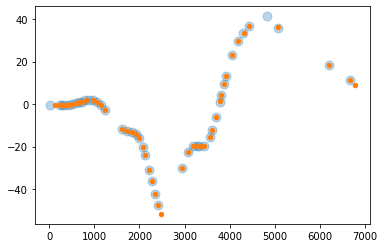

In [36]:
y = y_values


plt.scatter(peaks, list(y_values), alpha=0.3, marker='o', s=80)

plt.scatter(troughs, list(y_vals_t), marker='o', s=20)

In [37]:
len(y_values)

47

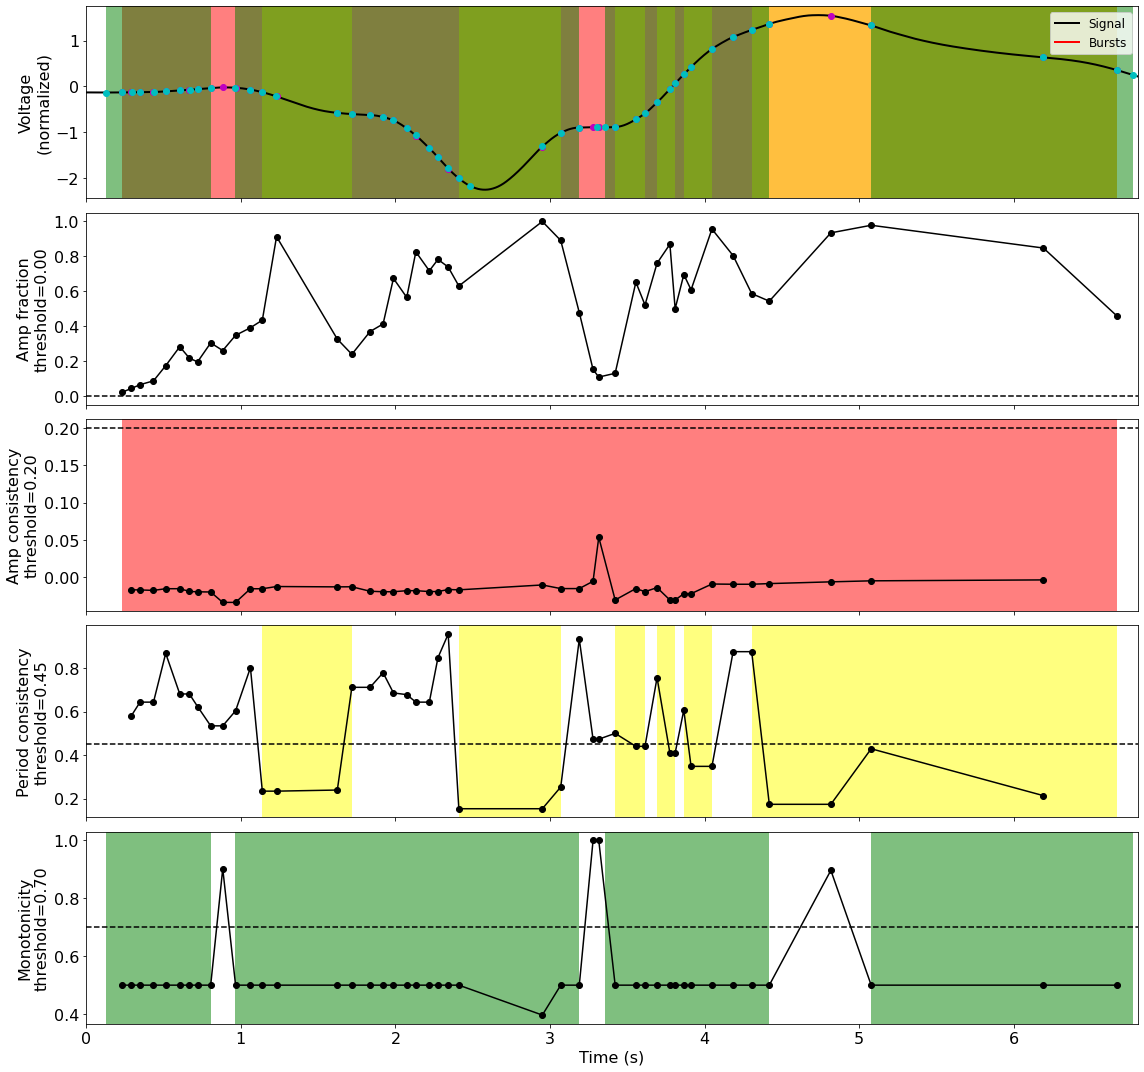

In [38]:



plot_burst_detect_summary(df_features, x_without[0], fs, threshold_kwargs, figsize=(16, 3))

plt.savefig('Burst_detect_plot')